In [92]:
import pandas as pd
import statistics 
import numpy as np

final_data.tsv contains the big data from Varicarta, which basically has 309239 variants of genes which are associated with ASD, compiled thorugh various research papers. The size of data is 4,66,926 rows and 54 columns. Each column has some some data wrt the gene_symbol and validation_method. We have various tests in the columns and their values which we use to analyze and draw further conclusions about the relatedness of gene with ASD.

In [93]:
data = pd.read_csv("final_data.tsv", sep = '\t')

C:\Users\dell\AppData\Local\Temp\ipykernel_6868\999181558.py:1: DtypeWarning: Columns (22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("final_final_data.tsv", sep = '\t')


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466926 entries, 0 to 466925
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   pid                      466926 non-null  int64  
 1   paper_key                466926 non-null  object 
 2   id                       466926 non-null  int64  
 3   paper_id                 466926 non-null  int64  
 4   sequencing_study_type    466926 non-null  object 
 5   event_id                 466926 non-null  int64  
 6   subject_id               466926 non-null  int64  
 7   sample_id                466926 non-null  object 
 8   chromosome               466926 non-null  int64  
 9   start_hg19               466926 non-null  int64  
 10  stop_hg19                466926 non-null  int64  
 11  ref                      466926 non-null  object 
 12  alt                      466926 non-null  object 
 13  gene_symbol              459564 non-null  object 
 14  cate

In the block of code below we sort the data of varicarta chromosomically and then for each such chromosome we make a dictionary where key is the chromosome number and the value is the pandas dataframe where we have selected only those rows where chromosome number is same as the key.
To replace the nan values we use the function median_with_nan and then relace the nan vallue withnthe median value to use for plotting later.

In [96]:
chromosomally_sorted_data = data.sort_values(by = 'chromosome')
chromosomally_sorted_data

dfs_by_number = {}

for number in chromosomally_sorted_data['chromosome'].unique():
    temp_df = chromosomally_sorted_data[chromosomally_sorted_data['chromosome'] == number]
    dfs_by_number[number] = temp_df

def median_with_nan(lst):
    valid_values = [x for x in lst if not np.isnan(x)]
    if valid_values:
        return statistics.median(valid_values)
    else:
        return float('nan')

dfs_by_num_poly = {}
dfs_by_num_positions = {}

for num in dfs_by_number:
    dfs_by_number[num].dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
    dff = dfs_by_number[num]['Polyphen2_HDIV_score'].tolist()
    positions_num = dfs_by_number[num]['start_hg19'].tolist()
    median_dff = median_with_nan(dff)
    for i in range(len(dff)):
        if np.isnan(dff[i]):
            dff[i] = median_dff
    dfs_by_num_poly[num] = dff
    dfs_by_num_positions[num] = positions_num


dfs_by_num_poly


C:\Users\dell\AppData\Local\Temp\ipykernel_6868\1104789274.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_by_number[num].dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_6868\1104789274.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_by_number[num].dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_6868\1104789274.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

{1: [1.0,
  1.0,
  0.945,
  0.0,
  0.807,
  0.997,
  1.0,
  1.0,
  0.167,
  0.997,
  0.999,
  1.0,
  0.345,
  0.857,
  0.922,
  0.962,
  0.062,
  0.433,
  0.999,
  1.0,
  0.896,
  0.999,
  1.0,
  0.999,
  0.0,
  0.001,
  0.688,
  0.999,
  0.999,
  0.49,
  0.988,
  0.302,
  0.966,
  0.991,
  0.988,
  0.997,
  1.0,
  1.0,
  1.0,
  1.0,
  0.878,
  1.0,
  0.966,
  0.002,
  0.935,
  0.885,
  1.0,
  1.0,
  1.0,
  0.944,
  0.005,
  0.681,
  0.009,
  0.996,
  0.989,
  0.122,
  0.999,
  0.683,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.32,
  1.0,
  1.0,
  0.793,
  1.0,
  0.0,
  0.008,
  1.0,
  0.008,
  0.024,
  0.049,
  0.65,
  0.955,
  0.999,
  0.001,
  0.159,
  1.0,
  1.0,
  1.0,
  0.996,
  1.0,
  0.998,
  0.801,
  0.933,
  0.996,
  0.002,
  0.933,
  1.0,
  1.0,
  1.0,
  0.392,
  0.005,
  0.004,
  1.0,
  0.146,
  1.0,
  1.0,
  0.998,
  0.968,
  1.0,
  0.012,
  1.0,
  0.425,
  0.638,
  0.99,
  0.051,
  0.408,
  1.0,
  1.0,
  1.0,
  0.996,
  0.008,
  0.996,
  0.999,
  1.0,
  0.989,
  1.0,
  

Here we identify all unique gene_symbols in the big database, varicarta

In [97]:
all_genes = data['gene_symbol'].unique().tolist()
all_genes

['SRSF7',
 'SCYL3',
 'CDKL3',
 'PCDH15',
 'GOLGA8M',
 'GAP43',
 'CCDC85A',
 'NHLH2',
 'XRCC5',
 'SETD7',
 'ABI3BP',
 'TRIM53AP',
 'DENND1A',
 'ANAPC1P1',
 'UBR4',
 'SNAPC5',
 'GTF3C2',
 'C19orf18',
 'RUBCN',
 'SMYD3',
 'NPC1',
 'MLLT10',
 'KSR2',
 'MYEF2',
 'LYST',
 'SCN2A',
 'PHF20',
 'EIF3G',
 'BMP2K',
 'FAM86B2',
 'METTL2B',
 'EPAS1',
 'MINDY4',
 'XRN2',
 'UNC79',
 'CENPBD1',
 'JAK2',
 'PRPF19',
 'ZNF699',
 'CLYBL',
 'NOL9',
 'RPL4',
 'FCER2',
 'WIPI1',
 'ACKR2',
 'LDAH',
 'TRIP12',
 'LSG1',
 'SMG6',
 'EP400',
 'CRTAC1',
 'ITIH3',
 'ITGA1',
 'B4GALNT3',
 'NPBWR2',
 'MTTP',
 'GLB1L2',
 'STAB2',
 'HHATL',
 'CXCR3',
 'NOX1',
 'ENOX2',
 'MAGEC3',
 'GAB3',
 'GLRA2',
 'ZFX',
 'CCNB3',
 'BEX2',
 'SERPINA7',
 'ARHGEF6',
 'ARMCX1',
 'MAGIX',
 'BMP15',
 'AFF2',
 'DCX',
 'SLC6A14',
 'PHKA2',
 'CTPS2',
 'ZNF182',
 'HEPH',
 'STARD8',
 'OR13H1',
 'OCRL',
 'ATP6AP1',
 'SHROOM2',
 'MED14',
 'PNMA3',
 'ARSF',
 'CFAP47',
 'SSX7',
 'TAF7L',
 'ZNF280C',
 'IDH3G',
 'EFR3A',
 'CASK',
 'ABCA3',
 'ARHGAP19

In [98]:
len(data['gene_symbol'].unique())

21701

When analyzing data to try and convert it to a database to use queries and make the output faster we encountered float values in an otherwise string format column of gene_symbol, here this function checks if there are any float values.

In [99]:
dtype_col1 = data['gene_symbol'].apply(type)
is_float_in_gene_symbol = any(dtype == float for dtype in dtype_col1)
is_float_in_gene_symbol

True

This Function removes the float values

In [100]:
df_no_float = data[~data['gene_symbol'].apply(lambda x: isinstance(x, float))]

In [101]:
dtype_col1 = df_no_float['gene_symbol'].apply(type)
is_float_in_gene_symbol = any(dtype == float for dtype in dtype_col1)
is_float_in_gene_symbol

False

This gene_list was obtained by looking at the sfari gene database and these genes are the ones with gene score of 3.0 and syndromic nature.

In [102]:
gene_list = ["ADGRL1", "ATP2B1", "CAMK2D", "CBX1", "CDH2", "CDK19", "CERT1", "CSNK1G1",
    "CTR9", "DHX9", "FGF13", "FRMD5", "FRYL", "MACF1", "MSX2", "NAA10", "PABPC1",
    "PJA1", "POLR2A", "POLR3A", "PPFIA3", "PPP3CA", "PRPF8", "RFX4", "RFX7", "RIMS2",
    "SRSF1", "TCEAL1", "TRIM8", "YWHAG", "ZFHX3", "ZFX"]

filtered_data = df_no_float[df_no_float['gene_symbol'].isin(gene_list)]
filtered_data

pid        paper_key       id  paper_id sequencing_study_type  \
80        2     Chahrour2012   988049         2                 exome   
202       9    Hashimoto2016   990509         9                 exome   
400      11     Iossifov2012   990707        11                 exome   
739      12     Iossifov2014   991046        12                 exome   
915      12     Iossifov2014   991222        12                 exome   
...     ...              ...      ...       ...                   ...   
459844  178  Cirnigliaro2023  1959883       178                genome   
459845  178  Cirnigliaro2023  1959884       178                genome   
463467  178  Cirnigliaro2023  1963506       178                genome   
464063  178  Cirnigliaro2023  1964102       178                genome   
466651  182         Chan2022  1966831       182                genome   

        event_id  subject_id   sample_id  chromosome  start_hg19  ...  \
80           120          65    AU035204          23    24197488  ...   
202         2560        1284       P1204          16    72845532  ...   
400         2721        1139    12773.p1           1   182852665  ...   
739         3052        1582    14196.p1           1    39838232  ...   
915         2721        1139    12773.p1           1   182852665  ...   
...          ...         ...         ...         ...         ...  ...   
459844    471209       60318   mAGRE2734          10    79784309  ...   
459845    471210       60618   mAGRE2735          10    79784309  ...   
463467    474817       60752   mAGRE4765          17     1557288  ...   
464063    475410       60161   mAGRE2091          17    56084441  ...   
466651    477938       57054  3-0476-000          23   153197564  ...   

        RadialSVM_pred LR_score LR_pred VEST3_score CADD_raw  CADD_phred  \
80                   T    0.163       T       0.326    3.545      18.080   
202                  D    0.944       D       0.957    3.948      20.200   
400                  T    0.289       T       0.780    5.214      33.000   
739                  T    0.076       T       0.226    0.948       8.865   
915                  T    0.289       T       0.780    5.214      33.000   
...                ...      ...     ...         ...      ...         ...   
459844             NaN      NaN     NaN         NaN    7.767      39.000   
459845             NaN      NaN     NaN         NaN    7.767      39.000   
463467             NaN      NaN     NaN         NaN   13.819      47.000   
464063               T    0.341       T       0.954    3.198      16.710   
466651               T    0.159       T       0.955    3.888      19.760   

        GERP_RS  phyloP46way_placental phyloP100way_vertebrate  \
80         6.13                  2.615                   4.711   
202        5.67                  2.828                   9.813   
400        5.39                  2.506                   8.921   
739        3.56                  1.064                   2.023   
915        5.39                  2.506                   8.921   
...         ...                    ...                     ...   
459844     5.52                  2.604                   9.168   
459845     5.52                  2.604                   9.168   
463467     6.17                  2.941                   9.586   
464063     6.11                  2.906                   6.995   
466651     3.91                  0.786                   7.376   

       SiPhy_29way_logOdds  
80                  19.725  
202                 19.722  
400                 18.775  
739                  5.764  
915                 18.775  
...                    ...  
459844              19.453  
459845              19.453  
463467              19.868  
464063              19.506  
466651              12.664  

[1424 rows x 54 columns]

In [103]:
usable_data = df_no_float.copy()

We go ahead and remove the columns we don't need further for our anaylsis.

In [104]:
columns_to_be_removed = ['code_change', 'protein_change', 'gene_detail', 'cytoband', 'clinvar_20150629','LRT_score', 'LRT_pred', 'MutationTaster_score', 'MutationTaster_pred', 'MutationAssessor_score', 'MutationAssessor_pred', 'FATHMM_score', 'FATHMM_pred', 'RadialSVM_score', 'RadialSVM_pred', 'LR_score', 'LR_pred', 'VEST3_score', 'CADD_raw', 'CADD_phred', 'GERP_RS', 'phyloP46way_placental', 'phyloP100way_vertebrate']
data1 = usable_data.drop(columns = columns_to_be_removed)
data5 = data1.copy()

In [105]:
column_reduction_data = data1.copy()

Here since we want to work with Polyphen2 and SIFT we rempve all the rows where values for polyphen and SIFT are null.

In [106]:
column_reduction_data.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)

In [107]:
column_reduction_data.dropna(subset=['SIFT_score'], inplace=True)

In [108]:
column_reduction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70309 entries, 2 to 466925
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pid                    70309 non-null  int64  
 1   paper_key              70309 non-null  object 
 2   id                     70309 non-null  int64  
 3   paper_id               70309 non-null  int64  
 4   sequencing_study_type  70309 non-null  object 
 5   event_id               70309 non-null  int64  
 6   subject_id             70309 non-null  int64  
 7   sample_id              70309 non-null  object 
 8   chromosome             70309 non-null  int64  
 9   start_hg19             70309 non-null  int64  
 10  stop_hg19              70309 non-null  int64  
 11  ref                    70309 non-null  object 
 12  alt                    70309 non-null  object 
 13  gene_symbol            70309 non-null  object 
 14  category               69890 non-null  object 
 15  func  

In [109]:
final_data = column_reduction_data.copy()
final_data


pid     paper_key       id  paper_id sequencing_study_type  event_id  \
2         0        An2014   987931         0                 exome         2   
10        0        An2014   987939         0                 exome        10   
16        0        An2014   987945         0                 exome        16   
17        0        An2014   987946         0                 exome        17   
18        0        An2014   987947         0                 exome        18   
...     ...           ...      ...       ...                   ...       ...   
466921  185  Viggiano2024  1967124       185         genome, exome    478182   
466922  185  Viggiano2024  1967125       185         genome, exome    478183   
466923  185  Viggiano2024  1967126       185         genome, exome    478184   
466924  185  Viggiano2024  1967127       185         genome, exome    478185   
466925  185  Viggiano2024  1967128       185         genome, exome    478186   

        subject_id           sample_id  chromosome  start_hg19  ...    exac03  \
2                2               05.s1           5   133635407  ...       NaN   
10              10               29.s1           3   100555977  ...       NaN   
16              14               02.s1           2    27550112  ...       NaN   
17               1               04.s1          19    58470038  ...       NaN   
18              15               06.s1           3   197421312  ...       NaN   
...            ...                 ...         ...         ...  ...       ...   
466921       60998  Viggiano2024:115.3          17     7227224  ...  0.000008   
466922       60999  Viggiano2024:101.3          17    73492511  ...  0.000008   
466923       61000   Viggiano2024:77.3          17    10432293  ...       NaN   
466924       61001   Viggiano2024:72.3          20    41306583  ...  0.000008   
466925       61002   Viggiano2024:90.3          22    43089396  ...  0.000008   

       CADD13_raw CADD13_phred SIFT_score SIFT_pred Polyphen2_HDIV_score  \
2             NaN          NaN       0.03         D                0.930   
10            NaN          NaN       0.56         T                0.000   
16        7.69570        35.00       0.05         D                1.000   
17        2.51209        19.55       0.07         T                0.154   
18        7.97258        35.00       0.00         D                1.000   
...           ...          ...        ...       ...                  ...   
466921    6.24468        28.90       0.03         D                1.000   
466922    7.47013        34.00       0.20         T                0.997   
466923    3.98488        23.60       0.20         T                0.991   
466924    4.48683        24.30       0.14         T                0.874   
466925    6.86577        33.00       0.00         D                1.000   

       Polyphen2_HDIV_pred Polyphen2_HVAR_score Polyphen2_HVAR_pred  \
2                        P                0.475                   P   
10                       B                0.001                   B   
16                       D                0.981                   D   
17                       B                0.053                   B   
18                       D                0.999                   D   
...                    ...                  ...                 ...   
466921                   D                1.000                   D   
466922                   D                0.736                   P   
466923                   D                0.952                   D   
466924                   P                0.166                   B   
466925                   D                1.000                   D   

       SiPhy_29way_logOdds  
2                   12.971  
10                   3.158  
16                  13.568  
17                   3.347  
18                  18.323  
...                    ...  
466921              18.619  
466922               9.874  
466923              18.683  
466924            

In [110]:
final_data.to_csv('output_final.csv', index = False)

Here we see how we can obtain the genes from SFARI and seperate the ones with a gene score of 3.0. A higher gene score can mean higher significance for that gene, in regards to the associated disease.

In [111]:
sfari_genes = pd.read_csv('SFARI-Gene_genes_03-28-2024release_05-12-2024export.csv') 
value_list = [3.0]
filtered_df = sfari_genes[sfari_genes['gene-score'].isin(value_list)]
filtered = filtered_df.copy()
filtered

status gene-symbol                                          gene-name  \
5          9        ABL2  ABL proto-oncogene 2, non-receptor tyrosine ki...   
15         9      ADGRL1             adhesion G protein-coupled receptor L1   
24         9       AGAP5  ArfGAP with GTPase domain, ankyrin repeat and ...   
37         9     ALDH1L1          aldehyde dehydrogenase 1 family member L1   
60         9     ARHGEF2       Rho/Rac guanine nucleotide exchange factor 2   
...      ...         ...                                                ...   
1142       9       YWHAG  tyrosine 3-monooxygenase/tryptophan 5-monooxyg...   
1143       9       YWHAZ  tyrosine 3-monooxygenase/tryptophan 5-monooxyg...   
1149       9      ZBTB47           zinc finger and BTB domain containing 47   
1165       9       ZFHX3                             zinc finger homeobox 3   
1166       9         ZFX                       zinc finger protein X-linked   

           ensembl-id chromosome  \
5     ENSG00000143322          1   
15    ENSG00000072071         19   
24    ENSG00000172650         10   
37    ENSG00000144908          3   
60    ENSG00000116584          1   
...               ...        ...   
1142  ENSG00000170027          7   
1143  ENSG00000164924          8   
1149  ENSG00000114853          3   
1165  ENSG00000140836         16   
1166  ENSG00000005889          X   

                                       genetic-category  gene-score  \
5                 Rare Single Gene Mutation, Functional         3.0   
15                 Rare Single Gene Mutation, Syndromic         3.0   
24                            Rare Single Gene Mutation         3.0   
37                            Rare Single Gene Mutation         3.0   
60                 Rare Single Gene Mutation, Syndromic         3.0   
...                                                 ...         ...   
1142               Rare Single Gene Mutation, Syndromic         3.0   
1143  Rare Single Gene Mutation, Syndromic, Genetic ...         3.0   
1149                          Rare Single Gene Mutation         3.0   
1165               Rare Single Gene Mutation, Syndromic         3.0   
1166               Rare Single Gene Mutation, Syndromic         3.0   

      syndromic  eagle  number-of-reports  
5             0    NaN                 10  
15            1    NaN                  5  
24            0    NaN                  2  
37            0    NaN                  7  
60            0    NaN                  7  
...         ...    ...                ...  
1142          1    NaN                 13  
1143          0    NaN                 16  
1149          0    NaN                  1  
1165          1    NaN                 12  
1166          1    NaN                  4  

[143 rows x 10 columns]

From here on we divide the SFARI gene data into 4 parts we want:
  - high_gene_score_syndromic - Score = 3.0, syndromic 
  - high_gene_score_non_syndromic - Score = 3.0, non-syndromic 
  - low_gene_score_syndromic - Score = 1.0, syndromic 
  - low_gene_score_non_syndromic - Score = 1.0, non-syndromic 

We use the gene-symbols from SFARI as a list and then use it to get the rows for dataframe with aforementioned names.

In [112]:
value_list = [1]
high_gene_score_syndromic = filtered[filtered['syndromic'].isin(value_list)]
high_gene_score_syndromic_list = high_gene_score_syndromic['gene-symbol'].tolist()
print(high_gene_score_syndromic_list)

['ADGRL1', 'ATP2B1', 'CAMK2D', 'CBX1', 'CDH2', 'CDK19', 'CERT1', 'CSNK1G1', 'CTR9', 'DHX9', 'FGF13', 'FRMD5', 'FRYL', 'MACF1', 'MSX2', 'NAA10', 'PABPC1', 'PJA1', 'POLR2A', 'POLR3A', 'PPFIA3', 'PPP3CA', 'PRPF8', 'RFX4', 'RFX7', 'RIMS2', 'SRSF1', 'TCEAL1', 'TRIM8', 'YWHAG', 'ZFHX3', 'ZFX']


In [113]:
high_gene_score_syndromic_df = df_no_float[df_no_float['gene_symbol'].isin(high_gene_score_syndromic_list)]
high_gene_score_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
high_gene_score_syndromic_polyphen2 = high_gene_score_syndromic_df['Polyphen2_HDIV_score'].tolist()

C:\Users\dell\AppData\Local\Temp\ipykernel_6868\12206861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_gene_score_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)


In [114]:
value_list1 = [0]
high_gene_score_non_syndromic = filtered[filtered['syndromic'].isin(value_list1)]
high_gene_score_non_syndromic_list = high_gene_score_non_syndromic['gene-symbol'].tolist()
high_gene_score_non_syndromic_df = df_no_float[df_no_float['gene_symbol'].isin(high_gene_score_non_syndromic_list)]
high_gene_score_non_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
high_gene_score_non_syndromic_polyphen2 = high_gene_score_non_syndromic_df['Polyphen2_HDIV_score'].tolist()

C:\Users\dell\AppData\Local\Temp\ipykernel_6868\1065187808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_gene_score_non_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)


In [115]:
 
value_list = [1.0]
filtered_df = sfari_genes[sfari_genes['gene-score'].isin(value_list)]
filtered_2 = filtered_df.copy()
filtered_2

status gene-symbol                                   gene-name  \
4          9       ABCE1   ATP binding cassette subfamily E member 1   
8          9        ACTB                                  actin beta   
17         9        ADNP  Activity-dependent neuroprotector homeobox   
19         9        ADSL                      adenylosuccinate lyase   
21         9        AFF2                   AF4/FMR2 family, member 2   
...      ...         ...                                         ...   
1147       9      ZBTB20    Zinc finger and BTB domain containing 20   
1148       9      ZBTB21    zinc finger and BTB domain containing 21   
1158       9      ZMYND8          zinc finger MYND-type containing 8   
1160       9      ZNF292                     zinc finger protein 292   
1162       9      ZNF462                     Zinc finger protein 462   

           ensembl-id chromosome  \
4     ENSG00000164163          4   
8     ENSG00000075624          7   
17    ENSG00000101126         20   
19    ENSG00000239900         22   
21    ENSG00000155966          X   
...               ...        ...   
1147  ENSG00000181722          3   
1148  ENSG00000173276         21   
1158  ENSG00000101040         20   
1160  ENSG00000188994          6   
1162  ENSG00000148143          9   

                                      genetic-category  gene-score  syndromic  \
4                            Rare Single Gene Mutation         1.0          0   
8                 Rare Single Gene Mutation, Syndromic         1.0          1   
17    Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
19                Rare Single Gene Mutation, Syndromic         1.0          1   
21                Rare Single Gene Mutation, Syndromic         1.0          0   
...                                                ...         ...        ...   
1147              Rare Single Gene Mutation, Syndromic         1.0          1   
1148                         Rare Single Gene Mutation         1.0          0   
1158              Rare Single Gene Mutation, Syndromic         1.0          1   
1160              Rare Single Gene Mutation, Syndromic         1.0          1   
1162  Rare Single Gene Mutation, Syndromic, Functional         1.0          1   

      eagle  number-of-reports  
4       NaN                  3  
8      1.00                 10  
17    41.50                 82  
19     0.35                  9  
21     8.70                 21  
...     ...                ...  
1147    NaN                 31  
1148    NaN                  4  
1158   4.50                  8  
1160    NaN                 12  
1162  10.60                 13  

[233 rows x 10 columns]

In [116]:
import numpy as np

In [117]:

value_list1 = [0]
low_gene_score_non_syndromic = filtered_2[filtered_2['syndromic'].isin(value_list1)]
low_gene_score_non_syndromic_list = low_gene_score_non_syndromic['gene-symbol'].tolist()
low_gene_score_non_syndromic_df = df_no_float[df_no_float['gene_symbol'].isin(low_gene_score_non_syndromic_list)]
low_gene_score_non_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
low_gene_score_non_syndromic_polyphen2 = low_gene_score_non_syndromic_df['Polyphen2_HDIV_score'].tolist()


C:\Users\dell\AppData\Local\Temp\ipykernel_6868\4125828421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_gene_score_non_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)


In [118]:
value_list2 = [1]
low_gene_score_syndromic = filtered_2[filtered_2['syndromic'].isin(value_list2)]
low_gene_score_syndromic_list = low_gene_score_syndromic['gene-symbol'].tolist()
low_gene_score_syndromic_df = df_no_float[df_no_float['gene_symbol'].isin(low_gene_score_syndromic_list)]
low_gene_score_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)
low_gene_score_syndromic_polyphen2 = low_gene_score_syndromic_df['Polyphen2_HDIV_score'].tolist()

C:\Users\dell\AppData\Local\Temp\ipykernel_6868\3885776538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_gene_score_syndromic_df.dropna(subset=['Polyphen2_HDIV_score'], inplace=True)


In [119]:
import matplotlib.pyplot as plt

Here we are plotting start_hg19 (starting address of variation) with Polyphen2_HVAR_score, this will give is an insight into the locus at which variation might be strong enough or pathogenic enough in regards to ASD. Higher the Polyphen2 scores the more we can say the gene is likely to be pathogenic. Here we are plotting by iterating over one chromosome at a time. We plot the chromosome-wise normal data with blue dots for each variant.

The red line represents high_gene_score_syndromic ones and there approx position but correct names as writte in legend. This similar approach is followed to make plots chromosome-wise for SIFT_score.

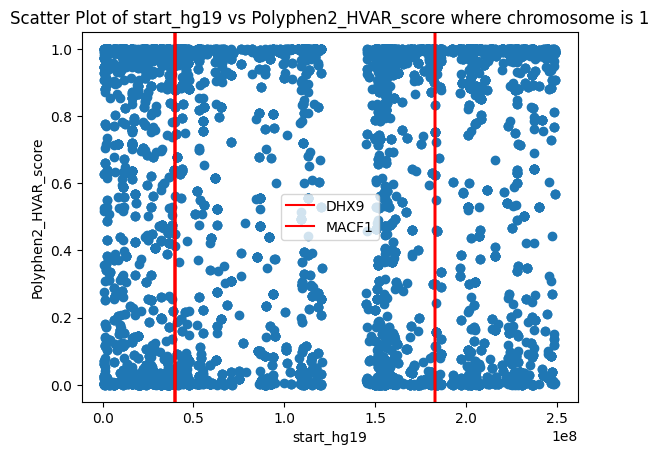

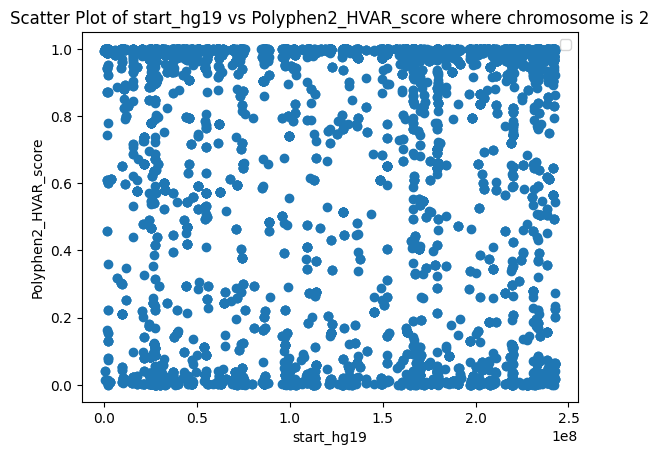

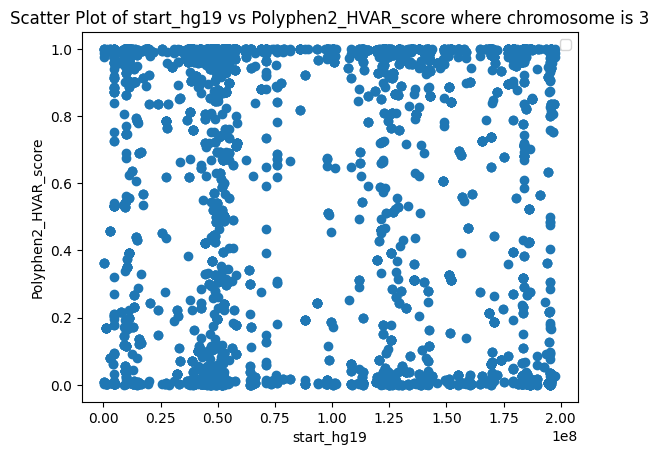

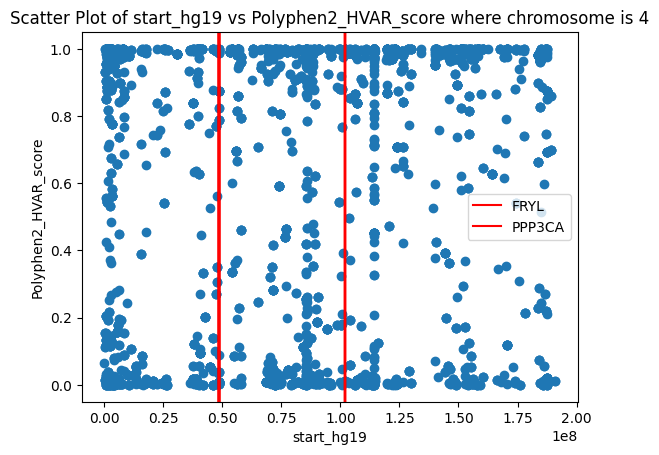

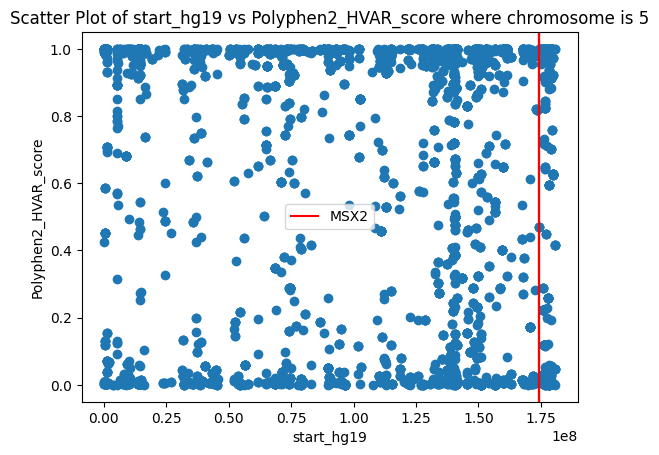

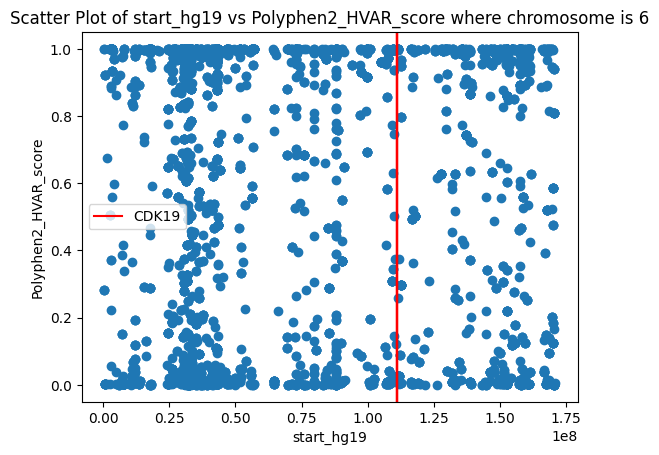

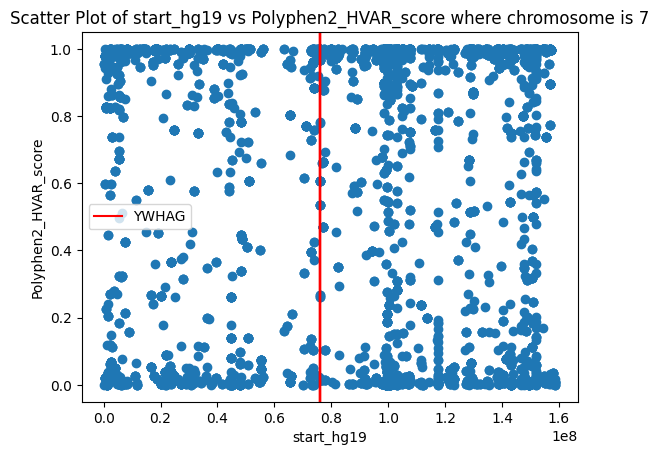

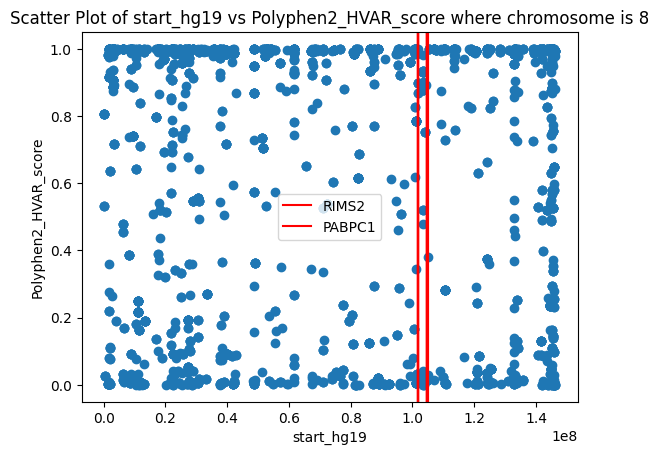

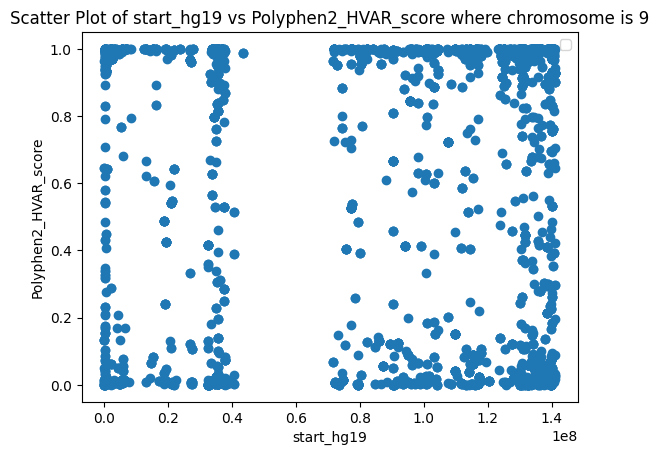

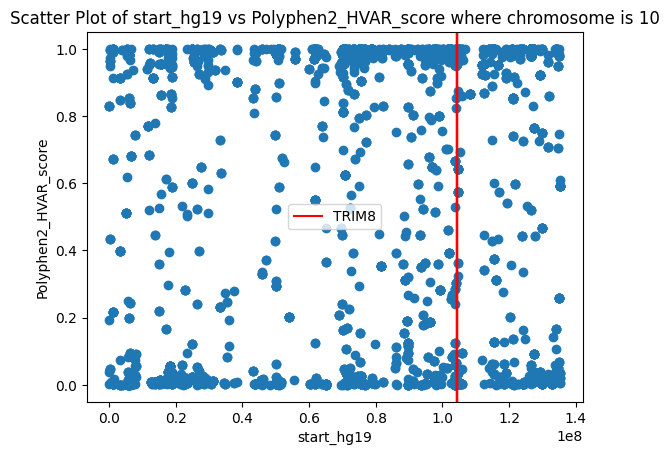

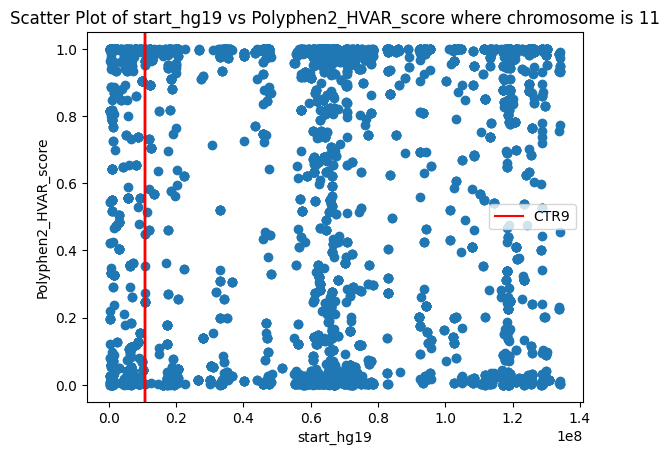

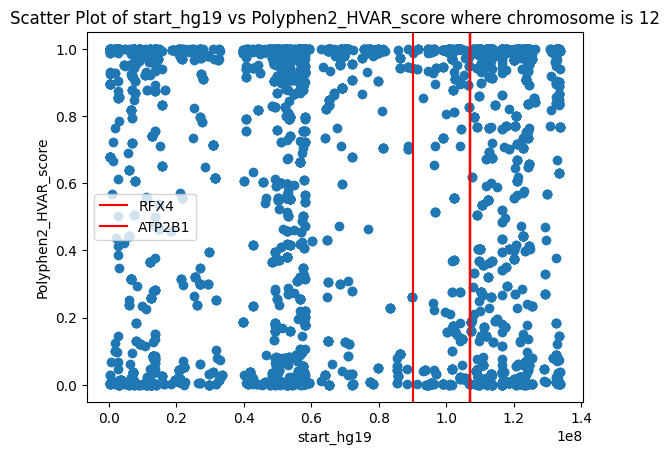

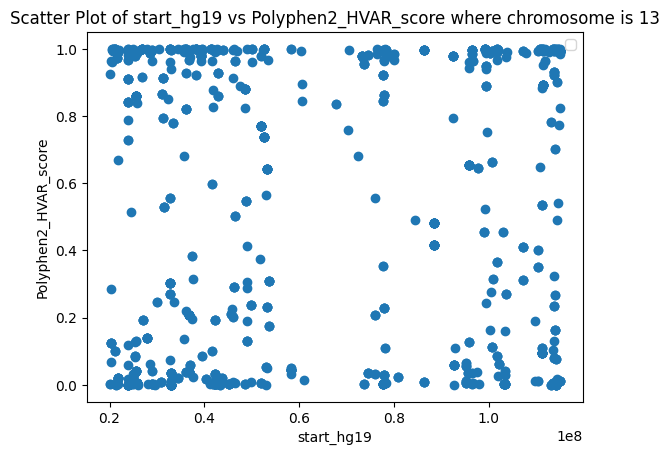

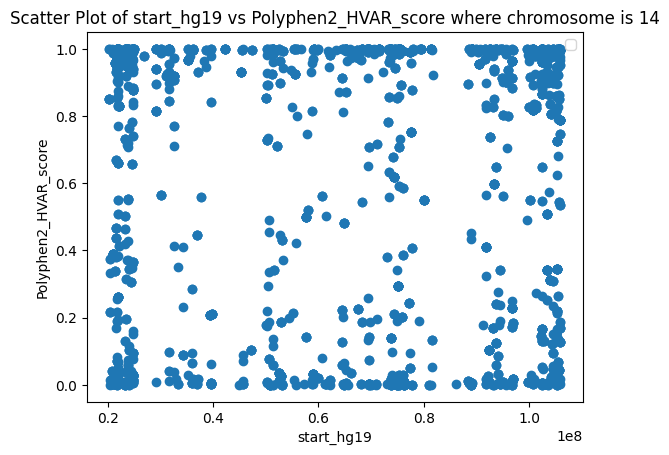

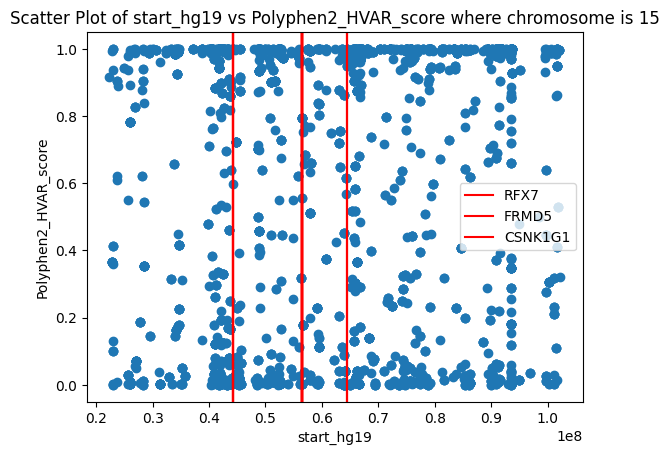

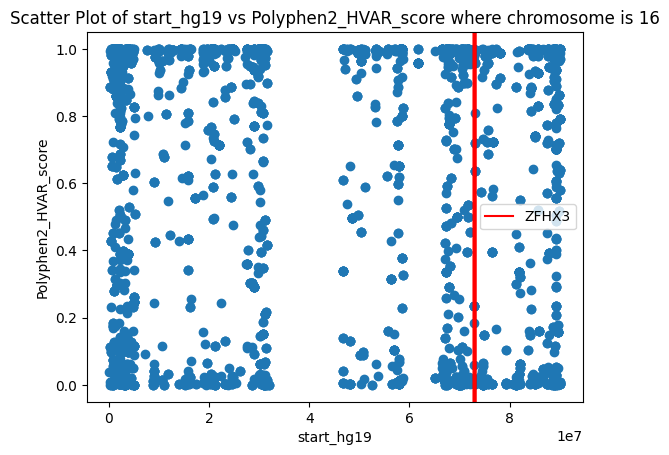

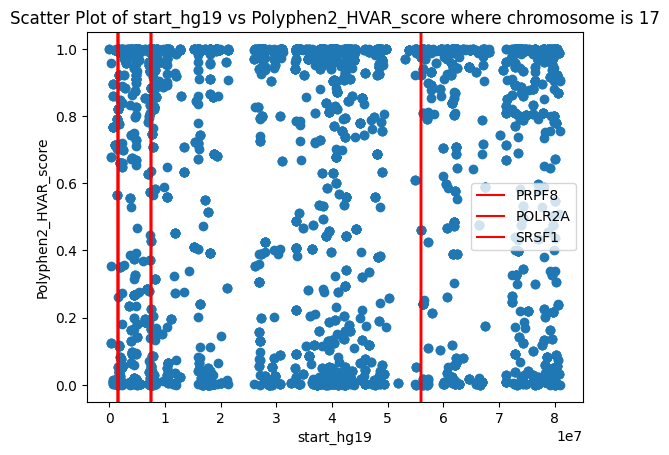

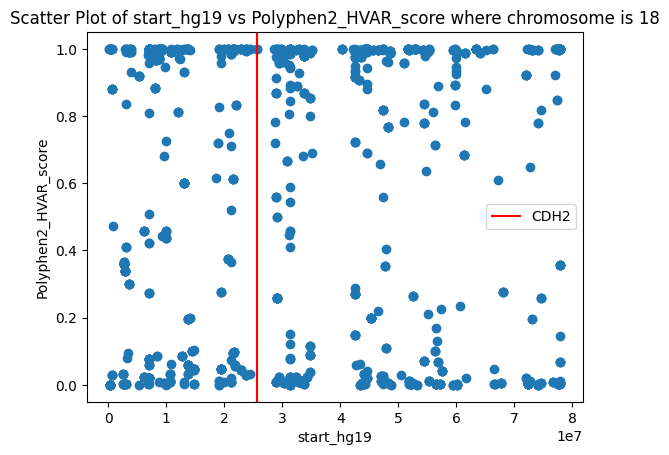

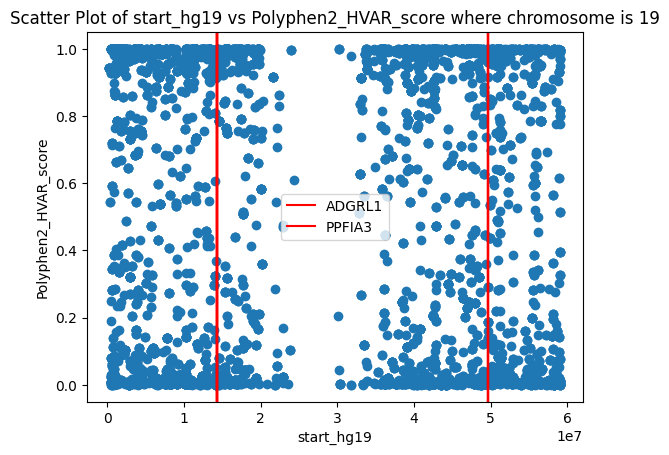

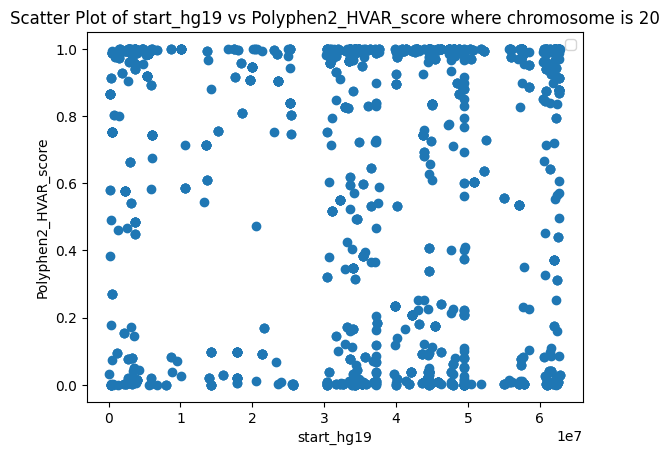

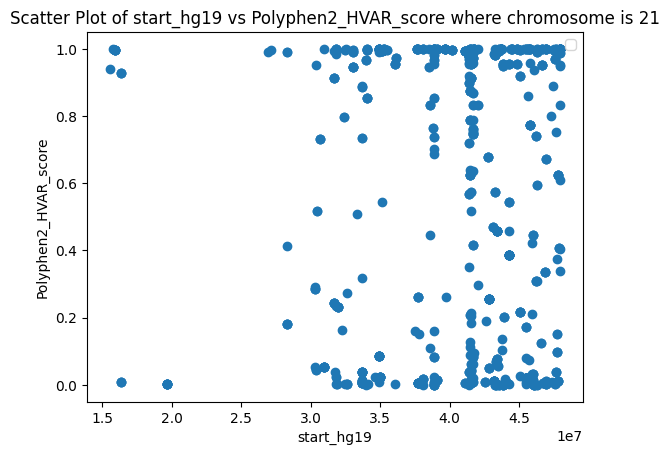

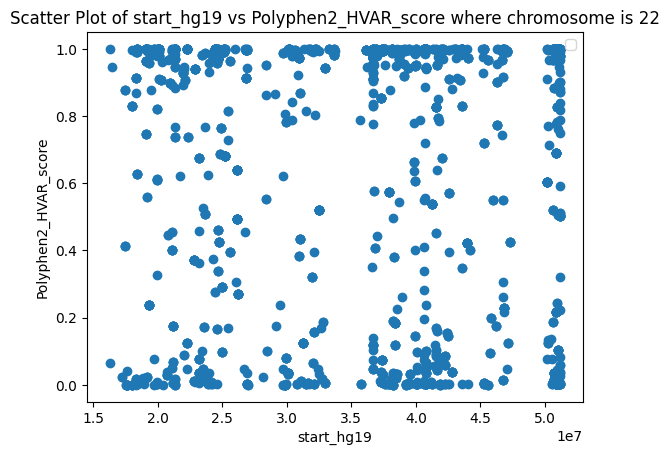

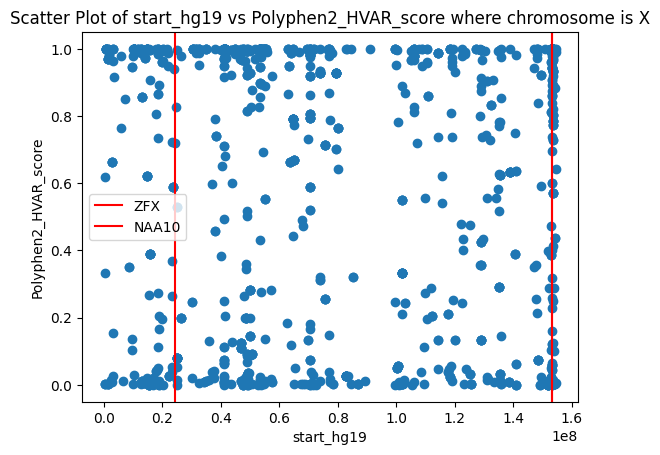

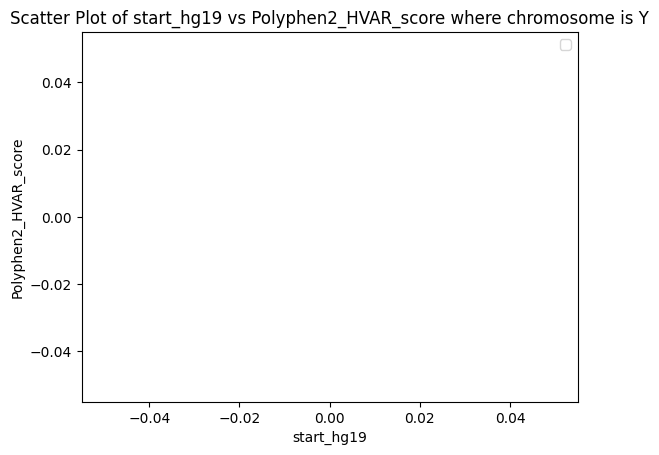

In [120]:
for i in range(1,25):
    legend_handles = {}
    chr = i
    filtered_df = data[data['chromosome'] == chr]
    plt.scatter(filtered_df['start_hg19'], filtered_df['Polyphen2_HVAR_score'])
    plt.xlabel('start_hg19')
    plt.ylabel('Polyphen2_HVAR_score')
    if (i == 23):
        chr = "X"
    elif (i == 24):
        chr = "Y"
    filtered_syndromic_chromosome = high_gene_score_syndromic_df[high_gene_score_syndromic_df['chromosome'] == i]
    for i, row in filtered_syndromic_chromosome.iterrows():
        line = plt.axvline(row['start_hg19'], color = 'red', label = row['gene_symbol'])
        if row['gene_symbol'] not in legend_handles:  
            legend_handles[row['gene_symbol']] = line
    plt.title(f'Scatter Plot of start_hg19 vs Polyphen2_HVAR_score where chromosome is {chr}')
    plt.legend(legend_handles.values(), legend_handles.keys())
    plt.show()

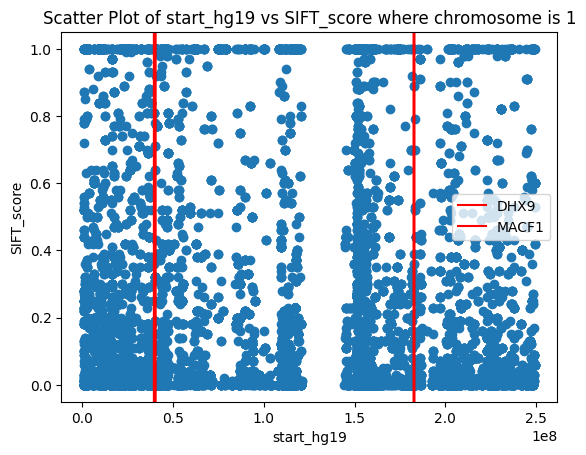

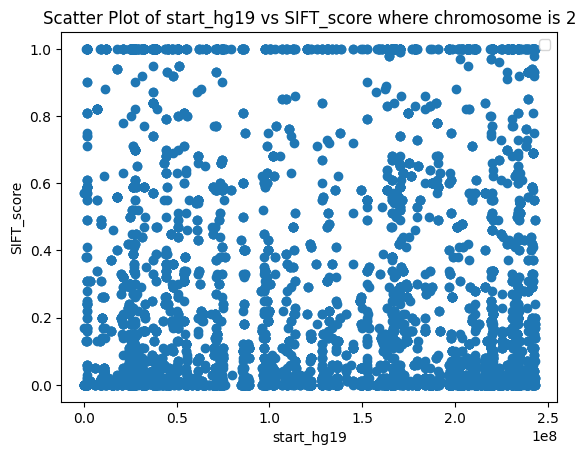

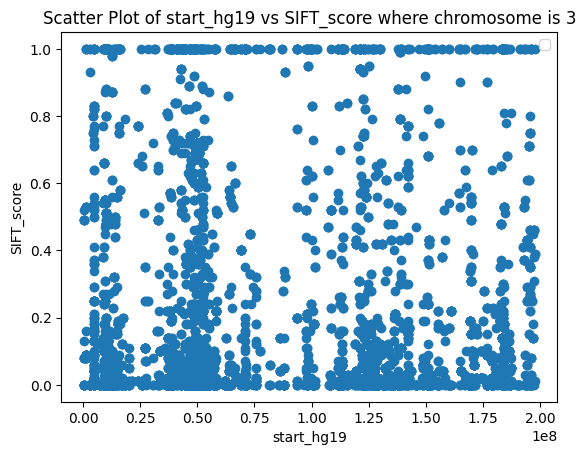

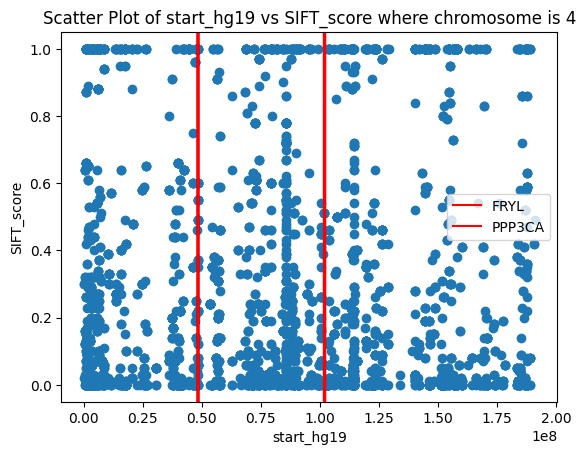

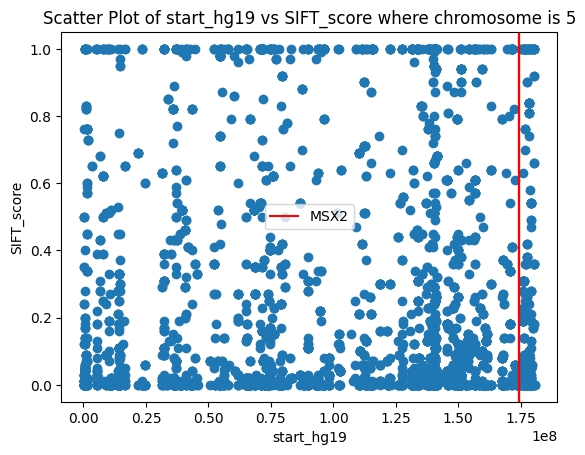

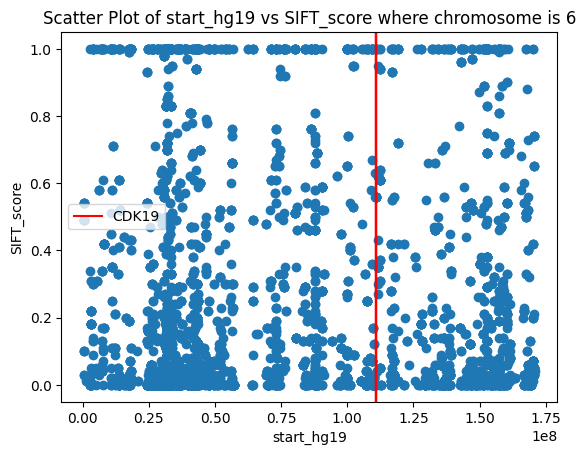

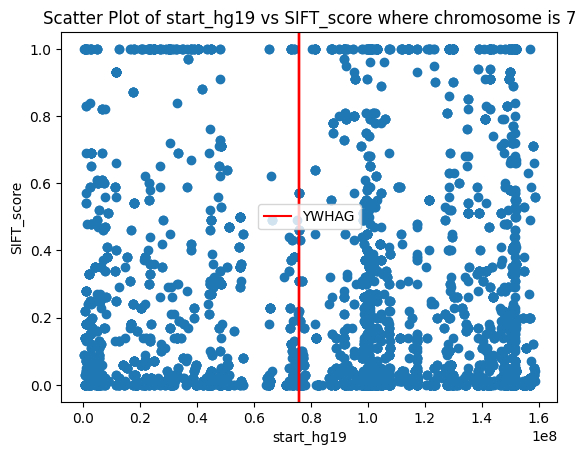

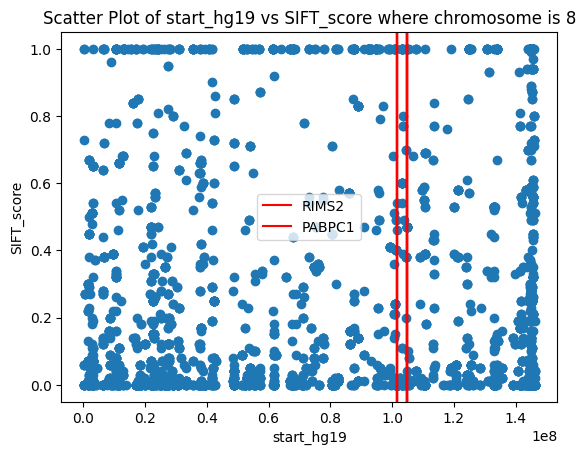

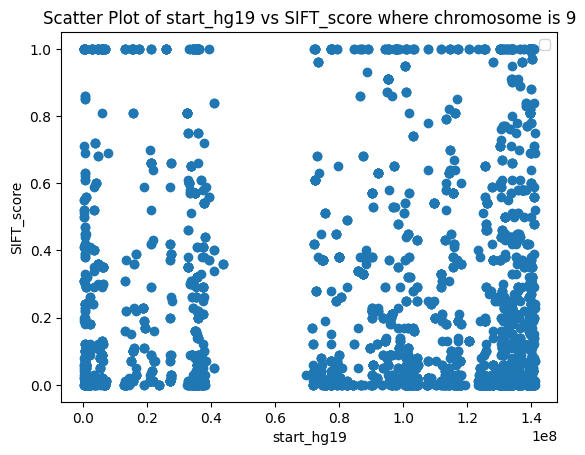

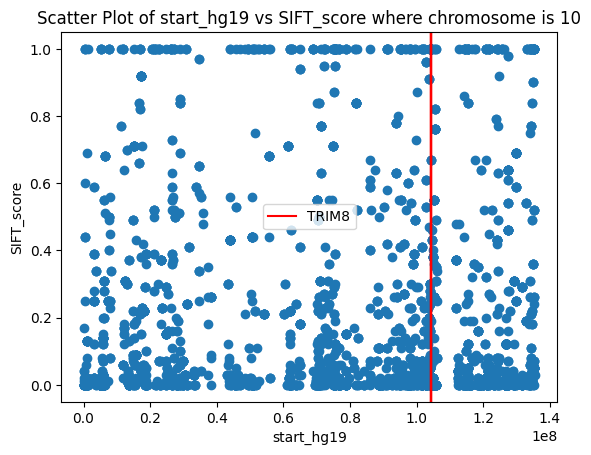

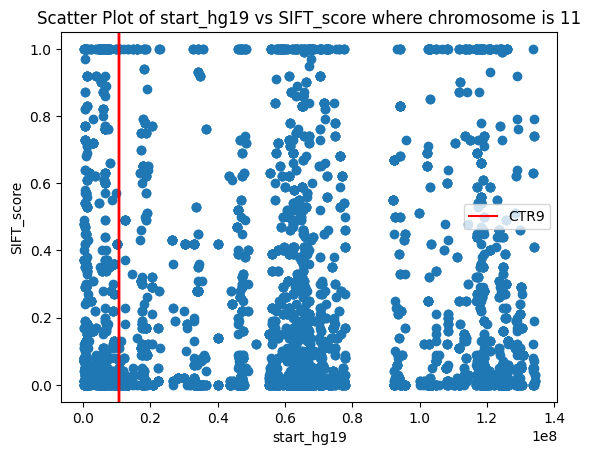

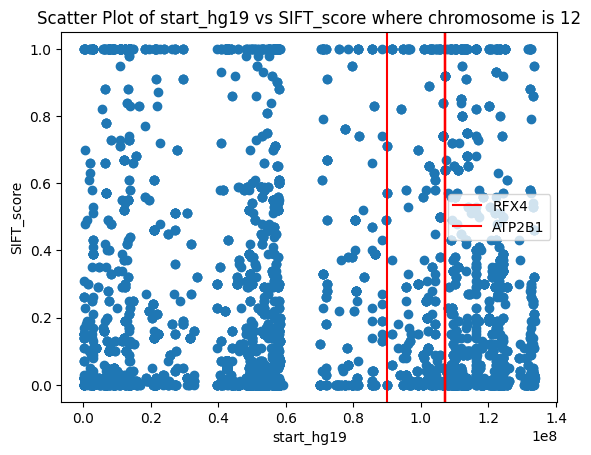

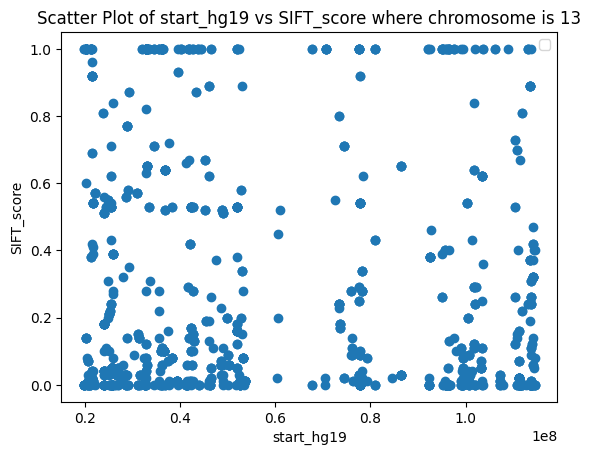

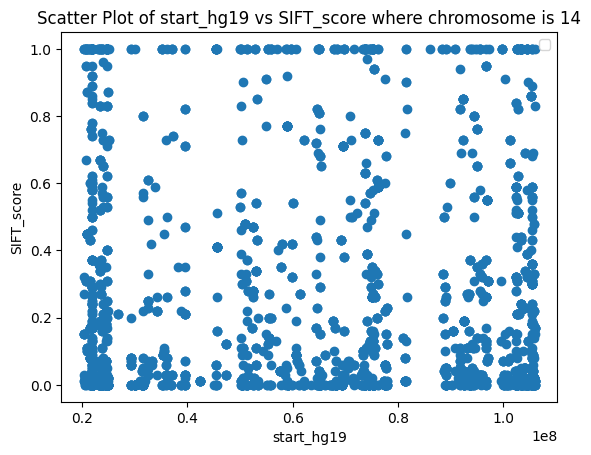

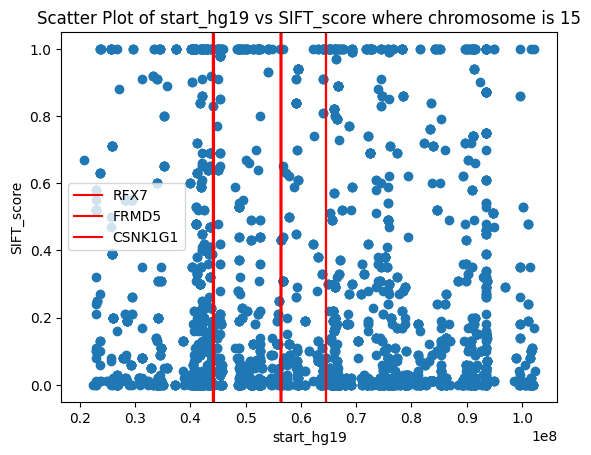

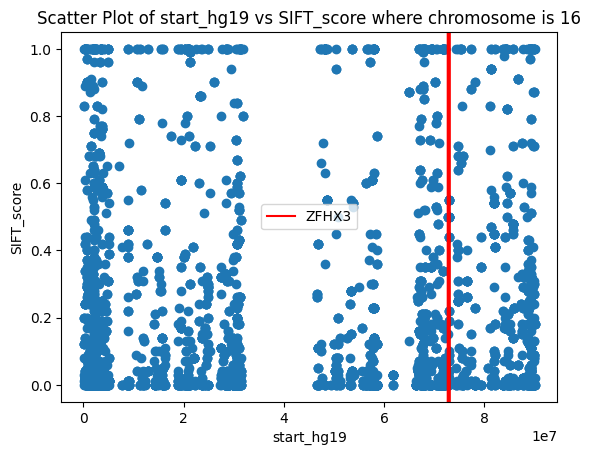

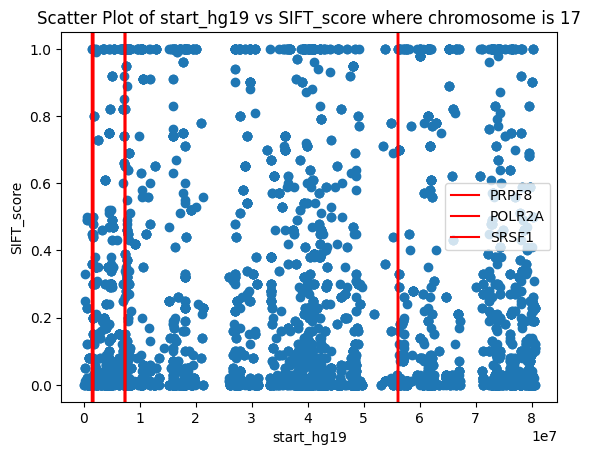

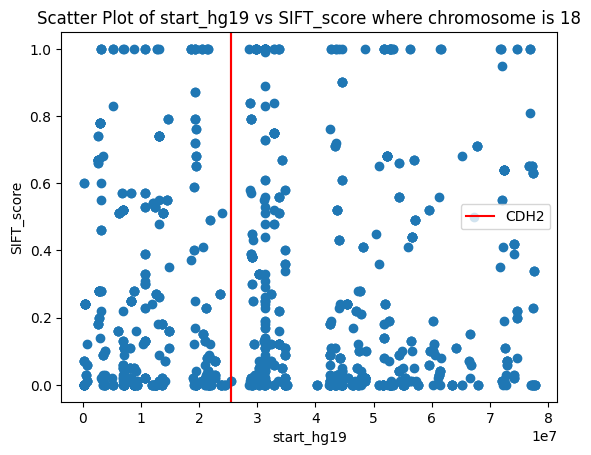

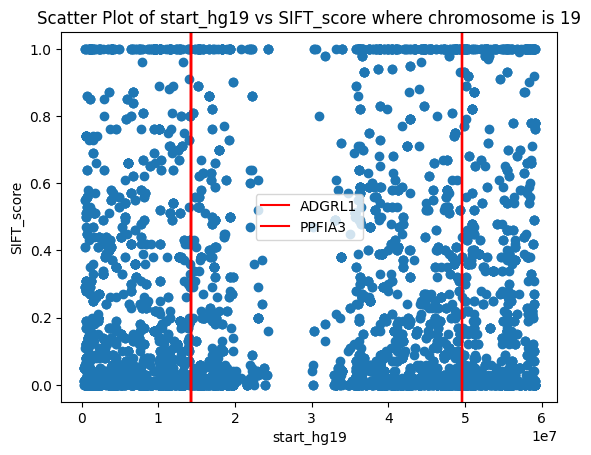

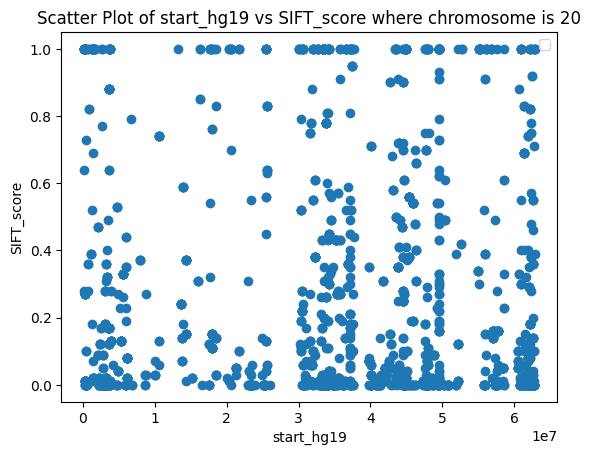

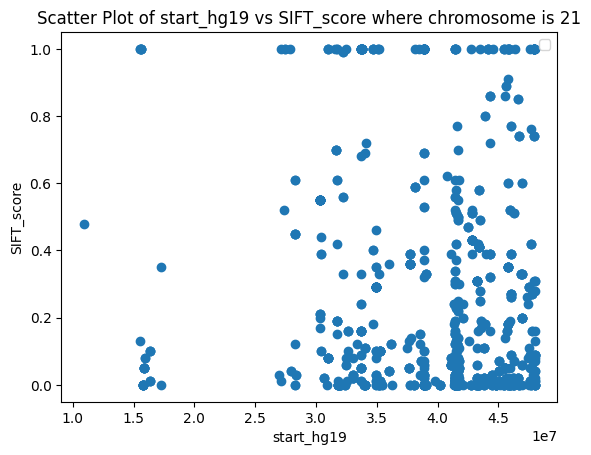

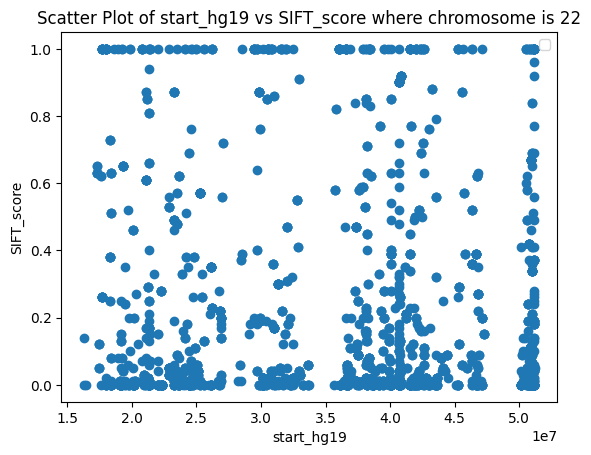

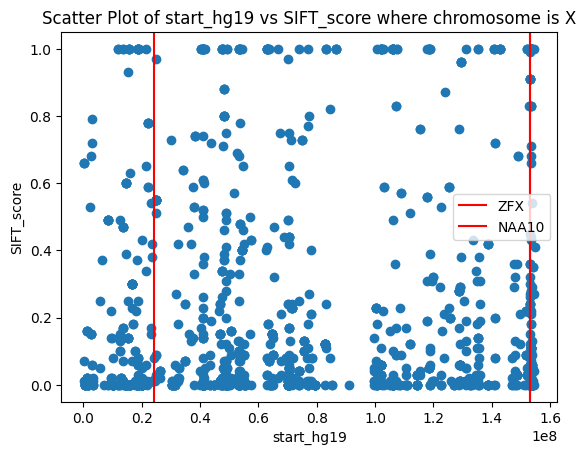

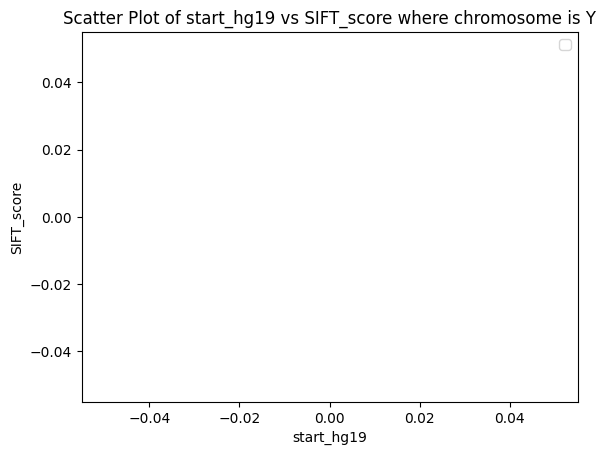

In [121]:
for i in range(1,25):
    legend_handles = {}
    chr = i
    filtered_df = data[data['chromosome'] == chr]
    plt.scatter(filtered_df['start_hg19'], filtered_df['SIFT_score'])
    plt.xlabel('start_hg19')
    plt.ylabel('SIFT_score')
    if (i == 23):
        chr = "X"
    elif (i == 24):
        chr = "Y"
    filtered_syndromic_chromosome = high_gene_score_syndromic_df[high_gene_score_syndromic_df['chromosome'] == i]
    for i, row in filtered_syndromic_chromosome.iterrows():
        line = plt.axvline(row['start_hg19'], color = 'red', label = row['gene_symbol'])
        if row['gene_symbol'] not in legend_handles:  # Add only unique handles and labels
            legend_handles[row['gene_symbol']] = line
    plt.legend(legend_handles.values(), legend_handles.keys())
    plt.title(f'Scatter Plot of start_hg19 vs SIFT_score where chromosome is {chr}')
    plt.show()

In [122]:
genes_taken_from_david = ['ATP2B1', 'FRMD5', 'POLR2A', 'ADGRL1', 'CDH2', 'CERT1', 'CDK19', 'FGF13', 'MSX2', 'PPP3CA', 'RIMS2', 'SRSF1', 'TRIM8', 'YWHAG']
filtered_gene_data = final_data[final_data['gene_symbol'].isin(genes_taken_from_david)]
filtered_gene_data2 = filtered_gene_data.copy()
filtered_gene_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 1859 to 464063
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pid                    106 non-null    int64  
 1   paper_key              106 non-null    object 
 2   id                     106 non-null    int64  
 3   paper_id               106 non-null    int64  
 4   sequencing_study_type  106 non-null    object 
 5   event_id               106 non-null    int64  
 6   subject_id             106 non-null    int64  
 7   sample_id              106 non-null    object 
 8   chromosome             106 non-null    int64  
 9   start_hg19             106 non-null    int64  
 10  stop_hg19              106 non-null    int64  
 11  ref                    106 non-null    object 
 12  alt                    106 non-null    object 
 13  gene_symbol            106 non-null    object 
 14  category               106 non-null    object 
 15  func 